# Word frequencies

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic 
from scipy.stats import fisher_exact

In [2]:
# Read CSV file into DataFrame df
# debates and mep info combined
df = pd.read_csv("C:\\Users\\Katharina\\Documents\\Uni\\6_WS2223\\Masterarbeit\\code\\WomenInEP\\data\\csv\\debates_meps_combined.csv", index_col=0)
df.head()

int_id    debate_id                 speaker  is_mep  \
0  2-008-000  20140701.EN              Presidente    True   
1  2-009-000  20140701.EN  Pablo Iglesias Turrión    True   
2  2-010-000  20140701.EN            Sajjad Karim    True   
3  2-011-000  20140701.EN          Ulrike Lunacek    True   
4  2-013-000  20140701.EN           Martin Schulz    True   

                                                text speaker_id role  party  \
0   Ringrazio il maestro e tutta l'orchestra. Ric...       4436  NaN    NaN   
1   Señor Presidente, es un honor dirigirme a ust...     125031  NaN    NaN   
2   Mr President, I rise to speak with a sense of...      28481  NaN    NaN   
3   Mr President, firstly let me welcome all the ...      97017  NaN    NaN   
4   Herr Präsident, meine sehr geehrten Damen und...       1911  NaN    NaN   

                                     text_translated language full Name  \
0  I thank the master and the whole orchestra.I r...       it       NaN   
1                                                NaN      NaN       NaN   
2  Mr President, I rise to speak with a sense of ...       en       NaN   
3  Mr President, firstly let me welcome all the n...       en       NaN   
4  Mr. President, my dear ladies and gentlemen, d...       de       NaN   

  country EU political group national political group      nationalty gender  \
0     NaN                NaN                      NaN           Italy      M   
1     NaN                NaN                      NaN           Spain      M   
2     NaN                NaN                      NaN  United Kingdom      M   
3     NaN                NaN                      NaN         Austria      F   
4     NaN                NaN                      NaN         Germany      M   

   birth_year       birth_place  \
0        1958       Lauria (PZ)   
1        1978            Madrid   
2        1970        Lancashire   
3        1957  Krems a.d. Donau   
4        1955          Hehlrath   

                                    political_groups  \
0  20-07-1999 / 19-07-2004 : Group of the Party o...   
1  01-07-2014 / 27-10-2015 : Confederal Group of ...   
2  20-07-2004 / 11-12-2007 : Group of the Allianc...   
3  14-07-2009 / 04-02-2013 : Group of the Greens/...   
4  19-07-1994 / 19-07-1999 : Group of the Party o...   

                                    national_parties  
0  20-07-1999 / 19-07-2004 : Democratici di Sinis...  
1          01-07-2014 / 27-10-2015 : PODEMOS (Spain)  
2  20-07-2004 / 13-07-2009 : UK Independence Part...  
3  14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...  
4  19-07-1994 / 19-07-1999 : Sozialdemokratische ...

In [3]:
# inspecting the feature characteristics
#df.birth_year.unique()
#df['EU political group'].count()
# for col in df.columns:
#     print(col)

In [4]:
df_all = df #without any df reduction (missing data etc)

extracting date from debate_id

In [5]:
date=df.debate_id.str.extract('(^\d*)')
df.insert (2, "date", date)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [6]:
# calcualting age at year of debate
df = df[df.birth_year != 0] #removing all rows (7940) with birth year = 0 
df = df.assign(YYYY = df.date)
df['YYYY'] = df.YYYY.dt.strftime('%Y')
df = df.assign(debate_year=df.YYYY.astype(int))
df = df.assign(age_atDebate = df.debate_year - df.birth_year)
df.head()

int_id    debate_id       date                 speaker  is_mep  \
0  2-008-000  20140701.EN 2014-07-01              Presidente    True   
1  2-009-000  20140701.EN 2014-07-01  Pablo Iglesias Turrión    True   
2  2-010-000  20140701.EN 2014-07-01            Sajjad Karim    True   
3  2-011-000  20140701.EN 2014-07-01          Ulrike Lunacek    True   
4  2-013-000  20140701.EN 2014-07-01           Martin Schulz    True   

                                                text speaker_id role  party  \
0   Ringrazio il maestro e tutta l'orchestra. Ric...       4436  NaN    NaN   
1   Señor Presidente, es un honor dirigirme a ust...     125031  NaN    NaN   
2   Mr President, I rise to speak with a sense of...      28481  NaN    NaN   
3   Mr President, firstly let me welcome all the ...      97017  NaN    NaN   
4   Herr Präsident, meine sehr geehrten Damen und...       1911  NaN    NaN   

                                     text_translated  ...  \
0  I thank the master and the whole orchestra.I r...  ...   
1                                                NaN  ...   
2  Mr President, I rise to speak with a sense of ...  ...   
3  Mr President, firstly let me welcome all the n...  ...   
4  Mr. President, my dear ladies and gentlemen, d...  ...   

  national political group      nationalty gender birth_year  \
0                      NaN           Italy      M       1958   
1                      NaN           Spain      M       1978   
2                      NaN  United Kingdom      M       1970   
3                      NaN         Austria      F       1957   
4                      NaN         Germany      M       1955   

        birth_place                                   political_groups  \
0       Lauria (PZ)  20-07-1999 / 19-07-2004 : Group of the Party o...   
1            Madrid  01-07-2014 / 27-10-2015 : Confederal Group of ...   
2        Lancashire  20-07-2004 / 11-12-2007 : Group of the Allianc...   
3  Krems a.d. Donau  14-07-2009 / 04-02-2013 : Group of the Greens/...   
4          Hehlrath  19-07-1994 / 19-07-1999 : Group of the Party o...   

                                    national_parties  YYYY debate_year  \
0  20-07-1999 / 19-07-2004 : Democratici di Sinis...  2014        2014   
1          01-07-2014 / 27-10-2015 : PODEMOS (Spain)  2014        2014   
2  20-07-2004 / 13-07-2009 : UK Independence Part...  2014        2014   
3  14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...  2014        2014   
4  19-07-1994 / 19-07-1999 : Sozialdemokratische ...  2014        2014   

  age_atDebate  
0           56  
1           36  
2           44  
3           57  
4           59  

[5 rows x 24 columns]

In [7]:
df_original = df # as a backup, with reduction of missing birth year

### all (NOT) translated interventions from original data set
268.591 of 275.096 translated (97,6%)
6.505 of 275.096 NOT translated (2,4%)

In [8]:
df_all_translated = df_all.loc[~df_all['language'].isna()]
df_all_translated

int_id    debate_id       date             speaker  is_mep  \
0        2-008-000  20140701.EN 2014-07-01          Presidente    True   
2        2-010-000  20140701.EN 2014-07-01        Sajjad Karim    True   
3        2-011-000  20140701.EN 2014-07-01      Ulrike Lunacek    True   
4        2-013-000  20140701.EN 2014-07-01       Martin Schulz    True   
5        2-014-000  20140701.EN 2014-07-01  Beatrix von Storch    True   
...            ...          ...        ...                 ...     ...   
275091  3-368-0000  20220216.EN 2022-02-16        Ciarán Cuffe    True   
275092  3-369-0000  20220216.EN 2022-02-16      Sēdes vadītājs    True   
275093  3-370-0000  20220216.EN 2022-02-16        Helena Dalli    True   
275094  3-371-0000  20220216.EN 2022-02-16      Sēdes vadītājs    True   
275095  3-380-0000  20220216.EN 2022-02-16      Sēdes vadītājs    True   

                                                     text     speaker_id  \
0        Ringrazio il maestro e tutta l'orchestra. Ric...           4436   
2        Mr President, I rise to speak with a sense of...          28481   
3        Mr President, firstly let me welcome all the ...          97017   
4        Herr Präsident, meine sehr geehrten Damen und...           1911   
5        Herr Präsident! Mein Name ist Beatrix von Sto...         124825   
...                                                   ...            ...   
275091   A Uachtarán, I dtús báire, bhí an togra Eurov...         197654   
275092   Liels paldies! Un tiešām gandarījums, ka Eiro...          28615   
275093   Mr President, it’s good to hear that many of ...  photo_generic   
275094   Debates ir beigušās par šo tematu, un es grib...          28615   
275095   Sēde ir noslēgusies, un tā atsāksies rītdien,...          28615   

                            role  party  \
0                            NaN    NaN   
2                            NaN    NaN   
3                            NaN    NaN   
4                            NaN    NaN   
5                            NaN    NaN   
...                          ...    ...   
275091                       NaN    NaN   
275092                       NaN    NaN   
275093  Member of the Commission    NaN   
275094                       NaN    NaN   
275095                       NaN    NaN   

                                          text_translated  ...     full Name  \
0       I thank the master and the whole orchestra.I r...  ...           NaN   
2       Mr President, I rise to speak with a sense of ...  ...           NaN   
3       Mr President, firstly let me welcome all the n...  ...           NaN   
4       Mr. President, my dear ladies and gentlemen, d...  ...           NaN   
5       Mister President!My name is Beatrix von Storch...  ...           NaN   
...                                                   ...  ...           ...   
275091  His president, initially, was the Eurovignette...  ...  Ciarán CUFFE   
275092  Thank you very much!And indeed, the European U...  ...  Roberts ZĪLE   
275093  Mr President, it’s good to hear that many of y...  ...           NaN   
275094  The debate has ended on this topic, and I want...  ...  Roberts ZĪLE   
275095  The meeting is over and will resume tomorrow, ...  ...  Roberts ZĪLE   

        country                           EU political group  \
0           NaN                                          NaN   
2           NaN                                          NaN   
3           NaN                                          NaN   
4           NaN                                          NaN   
5           NaN                                          NaN   
...         ...                                          ...   
275091  Ireland   Group of the Greens/European Free Alliance   
275092   Latvia  European Conservatives and Reformists Group   
275093      NaN                                          NaN   
275094   Latvia  European Conservatives and Reformists Group   
275095   Latvia  European Co

In [9]:
df_all_translated.nunique()

int_id                       87026
debate_id                      463
date                           463
speaker                       2052
is_mep                           1
text                        242872
speaker_id                    1352
role                           196
party                            0
text_translated             241902
language                        30
full Name                      686
country                         27
EU political group               8
national political group       208
nationalty                      28
gender                           2
birth_year                      63
birth_place                    947
political_groups               583
national_parties               865
dtype: int64

In [10]:
df_all_translated.language.value_counts()

en     56560
fr     37422
it     27625
es     24934
de     21694
el     12787
pt     12582
hu     10303
pl      9709
hr      8577
ro      6863
cs      6177
sk      5751
nl      5079
sl      4490
lt      4284
bg      2948
sv      2546
bs      2048
fi      1755
et      1187
lv      1113
da      1100
mt       607
ga       437
ilo        8
la         2
gn         1
tr         1
om         1
Name: language, dtype: int64

In [11]:
df_all_NOT_translated = df_all.loc[df_all['language'].isna()]
df_all_NOT_translated

int_id    debate_id       date                 speaker  is_mep  \
1        2-009-000  20140701.EN 2014-07-01  Pablo Iglesias Turrión    True   
8        2-018-250  20140701.EN 2014-07-01           Der Präsident    True   
25       3-010-000  20140702.EN 2014-07-02       Herman Van Rompuy    True   
26       3-011-000  20140702.EN 2014-07-02     José Manuel Barroso    True   
77       3-065-000  20140702.EN 2014-07-02       Herman Van Rompuy    True   
...            ...          ...        ...                     ...     ...   
275048  3-319-2500  20220216.EN 2022-02-16           Laura Ferrara    True   
275051  3-322-0000  20220216.EN 2022-02-16         Didier Reynders    True   
275056  3-329-0000  20220216.EN 2022-02-16       Marco Campomenosi    True   
275073  3-347-0000  20220216.EN 2022-02-16         Didier Reynders    True   
275078  3-354-0000  20220216.EN 2022-02-16     Giuseppe Ferrandino    True   

                                                     text     speaker_id  \
1        Señor Presidente, es un honor dirigirme a ust...         125031   
8        Liebe Kolleginnen und Kollegen, meine sehr ge...           1911   
25       Mr President, let me begin by expressing my w...  photo_generic   
26       Mr President, let me firstly congratulate you...  photo_generic   
77       Président du Conseil européen. - Monsieur le ...  photo_generic   
...                                                   ...            ...   
275048   per iscritto. – La 66esima sessione della Com...         124833   
275051   membre de la Commission. – Monsieur le Présid...  photo_generic   
275056   a nome del gruppo ID. – Signor Presidente, on...          35016   
275073   membre de la Commission. – Monsieur le Présid...  photo_generic   
275078   relatore. – Signor Presidente, onorevoli coll...         192634   

                                     role  party text_translated  ...  \
1                                     NaN    NaN             NaN  ...   
8                                     NaN    NaN             NaN  ...   
25      President of the European Council    NaN             NaN  ...   
26               Member of the Commission    NaN             NaN  ...   
77                                    NaN    NaN             NaN  ...   
...                                   ...    ...             ...  ...   
275048                                NaN    NaN             NaN  ...   
275051                                NaN    NaN             NaN  ...   
275056                                NaN    NaN             NaN  ...   
275073                                NaN    NaN             NaN  ...   
275078                                NaN    NaN             NaN  ...   

                  full Name country            EU political group  \
1                       NaN     NaN                           NaN   
8                       NaN     NaN                           NaN   
25                      NaN     NaN                           NaN   
26                      NaN     NaN                           NaN   
77                      NaN     NaN                           NaN   
...                     ...     ...                           ...   
275048        Laura FERRARA   Italy          Non-attached Members   
275051                  NaN     NaN                           NaN   
275056    Marco CAMPOMENOSI   Italy  Identity and Democracy Group   
275073                  NaN     NaN                           NaN   
275078  Giuseppe FERRANDINO   Italy            Renew Europe Group   

       national political group nationalty gender birth_year  birth_place  \
1                           NaN      Spain      M       1978       Madrid   
8                           NaN    Germany      M       1955     Hehlrath   
25                          NaN        NaN    NaN          0          NaN   
26                          NaN        NaN    NaN          0          NaN   
77                          NaN        NaN    NaN          0          N

In [12]:
df_all_NOT_translated.nunique()

int_id                      4179
debate_id                    445
date                         445
speaker                     1007
is_mep                         1
text                        6205
speaker_id                   751
role                          71
party                          0
text_translated                0
language                       0
full Name                    350
country                       27
EU political group             8
national political group     141
nationalty                    28
gender                         2
birth_year                    56
birth_place                  586
political_groups             389
national_parties             569
dtype: int64

## 'DF' changed: excluding NaN's of 'language'

In [13]:
#df = df_original #only use to reset 'df'
df = df.loc[~df['language'].isna()]
df

int_id    debate_id       date             speaker  is_mep  \
0        2-008-000  20140701.EN 2014-07-01          Presidente    True   
2        2-010-000  20140701.EN 2014-07-01        Sajjad Karim    True   
3        2-011-000  20140701.EN 2014-07-01      Ulrike Lunacek    True   
4        2-013-000  20140701.EN 2014-07-01       Martin Schulz    True   
5        2-014-000  20140701.EN 2014-07-01  Beatrix von Storch    True   
...            ...          ...        ...                 ...     ...   
275090  3-367-0000  20220216.EN 2022-02-16            Vera Tax    True   
275091  3-368-0000  20220216.EN 2022-02-16        Ciarán Cuffe    True   
275092  3-369-0000  20220216.EN 2022-02-16      Sēdes vadītājs    True   
275094  3-371-0000  20220216.EN 2022-02-16      Sēdes vadītājs    True   
275095  3-380-0000  20220216.EN 2022-02-16      Sēdes vadītājs    True   

                                                     text speaker_id role  \
0        Ringrazio il maestro e tutta l'orchestra. Ric...       4436  NaN   
2        Mr President, I rise to speak with a sense of...      28481  NaN   
3        Mr President, firstly let me welcome all the ...      97017  NaN   
4        Herr Präsident, meine sehr geehrten Damen und...       1911  NaN   
5        Herr Präsident! Mein Name ist Beatrix von Sto...     124825  NaN   
...                                                   ...        ...  ...   
275090   Voorzitter, het huidige tolsysteem in de EU i...     197756  NaN   
275091   A Uachtarán, I dtús báire, bhí an togra Eurov...     197654  NaN   
275092   Liels paldies! Un tiešām gandarījums, ka Eiro...      28615  NaN   
275094   Debates ir beigušās par šo tematu, un es grib...      28615  NaN   
275095   Sēde ir noslēgusies, un tā atsāksies rītdien,...      28615  NaN   

        party                                    text_translated  ...  \
0         NaN  I thank the master and the whole orchestra.I r...  ...   
2         NaN  Mr President, I rise to speak with a sense of ...  ...   
3         NaN  Mr President, firstly let me welcome all the n...  ...   
4         NaN  Mr. President, my dear ladies and gentlemen, d...  ...   
5         NaN  Mister President!My name is Beatrix von Storch...  ...   
...       ...                                                ...  ...   
275090    NaN  Chairman, the current toll system in the EU is...  ...   
275091    NaN  His president, initially, was the Eurovignette...  ...   
275092    NaN  Thank you very much!And indeed, the European U...  ...   
275094    NaN  The debate has ended on this topic, and I want...  ...   
275095    NaN  The meeting is over and will resume tomorrow, ...  ...   

                                 national political group      nationalty  \
0                                                     NaN           Italy   
2                                                     NaN  United Kingdom   
3                                                     NaN         Austria   
4                                                     NaN         Germany   
5                                                     NaN         Germany   
...                                                   ...             ...   
275090                               Partij van de Arbeid     Netherlands   
275091                                        Green Party         Ireland   
275092  Nacionālā apvienība "Visu Latvijai!"-"Tēvzemei...          Latvia   
275094  Nacionālā apvienība "Visu Latvijai!"-"Tēvzemei...          Latvia   
275095  Nacionālā apvienība "Visu Latvijai!"-"Tēvzemei...          Latvia   

       gender birth_year       birth_place  \
0           M       1958       Lauria (PZ)   
2           M       1970        Lancashire   
3           F       1957  Krems a.d. Donau   
4           M       1955          Hehlrath   
5           F       1971            Lübeck   
...       ...        ...               ...   
275090      F       1972             Venlo   
275091      M       1963    

## general plots by diff variables

In [14]:
df_gender = df[['date', 'gender', 'EU political group', 'country', 'language']] #using backup df
df_gender.head()

date gender EU political group country language
0 2014-07-01      M                NaN     NaN       it
2 2014-07-01      M                NaN     NaN       en
3 2014-07-01      F                NaN     NaN       en
4 2014-07-01      M                NaN     NaN       de
5 2014-07-01      F                NaN     NaN       de

In [15]:
df_gender = df_gender.assign(mmYYYY = df_gender.date)
df_gender['mmYYYY'] = df_gender.mmYYYY.dt.strftime('%m%Y')
df_gender['mmYYYY'] = pd.to_datetime(df_gender['mmYYYY'], format='%m%Y')
df_gender.tail()

date gender                                 EU political group  \
275090 2022-02-16      F  Group of the Progressive Alliance of Socialist...   
275091 2022-02-16      M         Group of the Greens/European Free Alliance   
275092 2022-02-16      M        European Conservatives and Reformists Group   
275094 2022-02-16      M        European Conservatives and Reformists Group   
275095 2022-02-16      M        European Conservatives and Reformists Group   

            country language     mmYYYY  
275090  Netherlands       nl 2022-02-01  
275091      Ireland       ga 2022-02-01  
275092       Latvia       lv 2022-02-01  
275094       Latvia       lv 2022-02-01  
275095       Latvia       lv 2022-02-01

<AxesSubplot: xlabel='mmYYYY'>

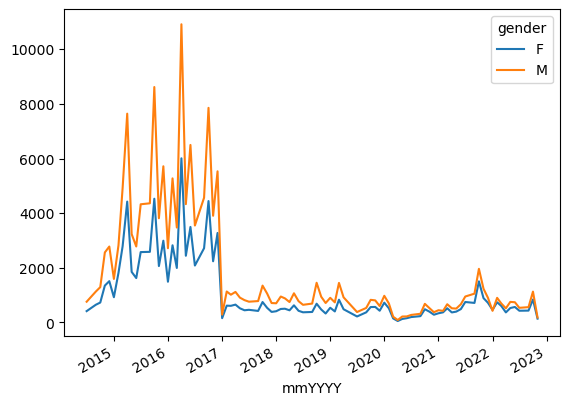

In [16]:
df_mmYYYY_gender_grouped = df_gender.groupby(["mmYYYY", "gender"]).size()
df_mmYYYY_gender_grouped = df_mmYYYY_gender_grouped.unstack()
df_mmYYYY_gender_grouped.plot()

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/general_male-female.png')

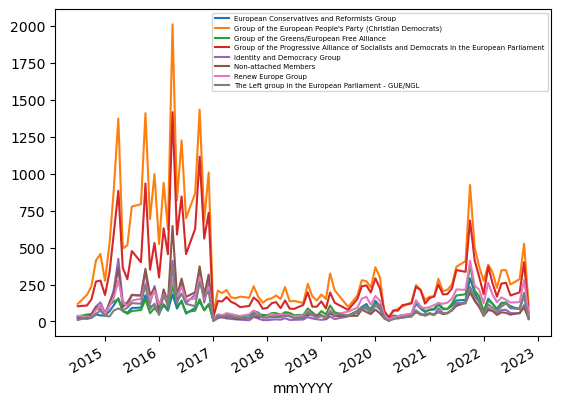

In [17]:
df_mmYYYY_polgroup_grouped = df_gender.groupby(["mmYYYY", "EU political group"]).size()
df_mmYYYY_polgroup_grouped = df_mmYYYY_polgroup_grouped.unstack()
df_mmYYYY_polgroup_grouped.plot().legend(loc=1, prop={'size': 5})

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/general_polgroup.png')

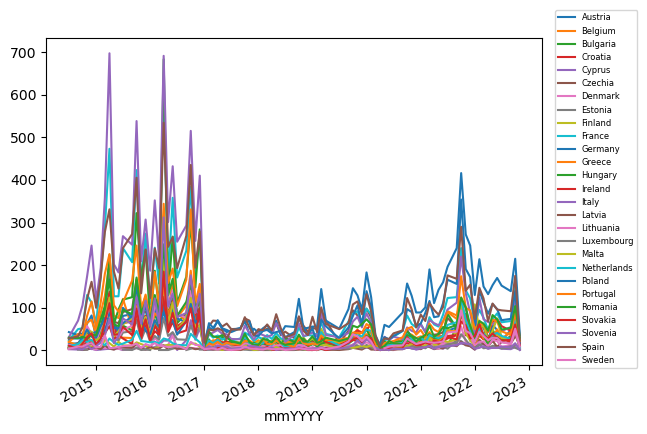

In [18]:
df_mmYYYY_country_grouped = df_gender.groupby(["mmYYYY", "country"]).size()
df_mmYYYY_country_grouped = df_mmYYYY_country_grouped.unstack()
df_mmYYYY_country_grouped.plot().legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), prop={'size': 6})

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/general_country.png')

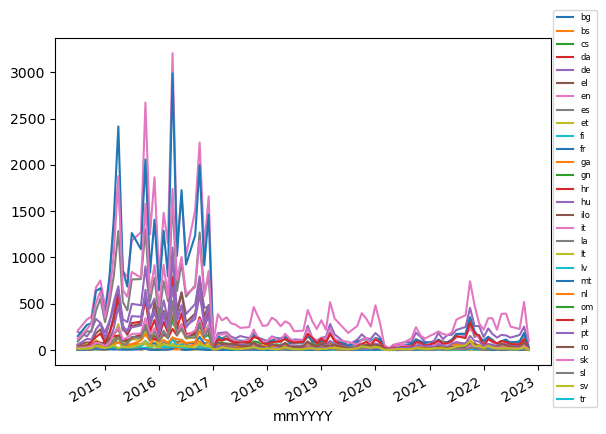

In [19]:
df_mmYYYY_language_grouped = df_gender.groupby(["mmYYYY", "language"]).size()
df_mmYYYY_language_grouped = df_mmYYYY_language_grouped.unstack()
df_mmYYYY_language_grouped.plot().legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop={'size': 6})

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/general_language.png')

## VIZ by gender

### total interventions by F and M

In [20]:
df_gender_sum = df_gender['gender'].value_counts()

<AxesSubplot: title={'center': 'Interventions by gender'}>

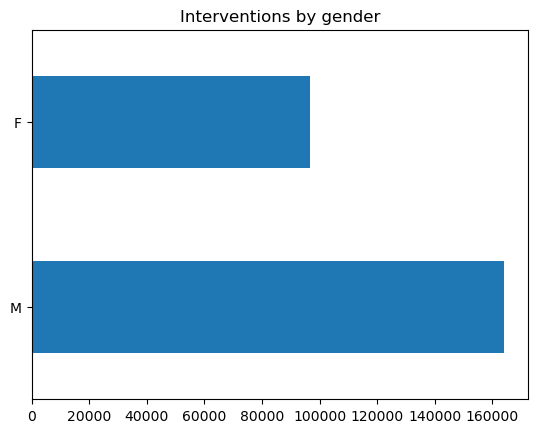

In [21]:
df_gender_sum.plot.barh(title='Interventions by gender')

### % of women/men per debate

In [22]:
df_gender_grpd = df_gender.groupby(['date', 'gender'])['gender'].count().reset_index(name='count_by_gender')
df_gender_grpd

date gender  count_by_gender
0   2014-07-01      F                3
1   2014-07-01      M               19
2   2014-07-02      F               37
3   2014-07-02      M              103
4   2014-07-03      M                1
..         ...    ...              ...
912 2022-10-20      M               58
913 2022-11-09      F               98
914 2022-11-09      M              143
915 2022-11-10      F               43
916 2022-11-10      M               40

[917 rows x 3 columns]

In [23]:
df_gender_pct = df_gender_grpd.groupby(['date','gender']).sum()
df_gender_pct = df_gender_pct.div(df_gender_pct.sum(level=0), level=0)
df_gender_pct

C:\Users\Katharina\AppData\Local\Temp\ipykernel_11624\2873864695.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_gender_pct = df_gender_pct.div(df_gender_pct.sum(level=0), level=0)


count_by_gender
date       gender                 
2014-07-01 F              0.136364
           M              0.863636
2014-07-02 F              0.264286
           M              0.735714
2014-07-03 M              1.000000
...                            ...
2022-10-20 M              0.563107
2022-11-09 F              0.406639
           M              0.593361
2022-11-10 F              0.518072
           M              0.481928

[917 rows x 1 columns]

In [24]:
#validity check: returns all debates with count_by_gender value greater than xx
#df_gender_pct[df_gender_pct.count_by_gender > 0.89]

In [25]:
#df[df.date == '2020-10-23']

<AxesSubplot: xlabel='date,gender'>

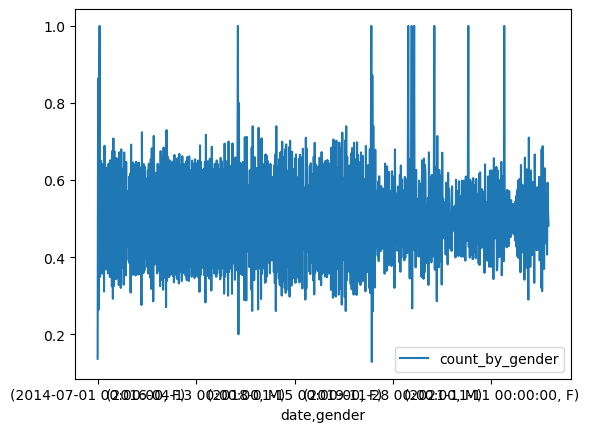

In [26]:
df_gender_pct.plot()

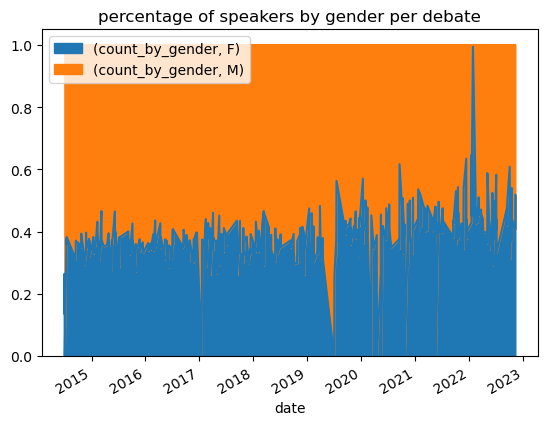

In [27]:
df_gender_pct_1 = df_gender_pct.unstack()
df_gender_pct_1.plot(title='percentage of speakers by gender per debate', kind='area').legend(loc='upper left')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/pct_per-debate_by-gender.png')

### rolling mean of absolute numbers of speakers

In [28]:
df_gender_rolling_mean = df_gender_grpd.groupby(['date','gender']).sum()
df_gender_rolling_mean
#df_gender_grpd

count_by_gender
date       gender                 
2014-07-01 F                     3
           M                    19
2014-07-02 F                    37
           M                   103
2014-07-03 M                     1
...                            ...
2022-10-20 M                    58
2022-11-09 F                    98
           M                   143
2022-11-10 F                    43
           M                    40

[917 rows x 1 columns]

In [29]:
df_gender_rolling_mean = df_gender_rolling_mean.unstack()
df_gender_rolling_mean.columns = df_gender_rolling_mean.columns.droplevel()
df_gender_rolling_mean

gender          F      M
date                    
2014-07-01    3.0   19.0
2014-07-02   37.0  103.0
2014-07-03    NaN    1.0
2014-07-14   15.0   28.0
2014-07-15  115.0  189.0
...           ...    ...
2022-10-18  144.0  246.0
2022-10-19  146.0  189.0
2022-10-20   45.0   58.0
2022-11-09   98.0  143.0
2022-11-10   43.0   40.0

[463 rows x 2 columns]

In [30]:
df_gender_rolling_mean['F'] = df_gender_rolling_mean['F'].rolling(10).mean()
df_gender_rolling_mean['M'] = df_gender_rolling_mean['M'].rolling(10).mean()

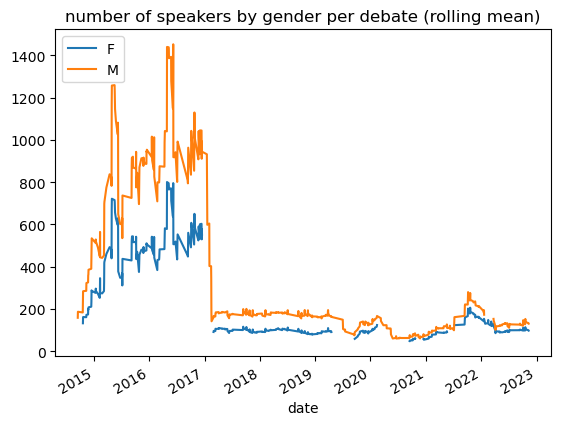

In [31]:
#PLOT
df_gender_rolling_mean.plot(title='number of speakers by gender per debate (rolling mean)', kind='line').legend(loc='upper left')
plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/rolling-mean-abs_per-debate_by-gender.png')

### rolling mean of percentage of speakers

In [32]:
df_gender_pct_1.head()

count_by_gender          
gender                   F         M
date                                
2014-07-01        0.136364  0.863636
2014-07-02        0.264286  0.735714
2014-07-03             NaN  1.000000
2014-07-14        0.348837  0.651163
2014-07-15        0.378289  0.621711

In [33]:
df_gender_rolling_mean_pct = df_gender_pct_1
df_gender_rolling_mean_pct.columns = df_gender_rolling_mean_pct.columns.droplevel()
df_gender_rolling_mean_pct.head()

gender             F         M
date                          
2014-07-01  0.136364  0.863636
2014-07-02  0.264286  0.735714
2014-07-03       NaN  1.000000
2014-07-14  0.348837  0.651163
2014-07-15  0.378289  0.621711

In [34]:
#df_gender_rolling_mean_pct
df_gender_rolling_mean_pct['F'] = df_gender_rolling_mean_pct['F'].rolling(10).mean()
df_gender_rolling_mean_pct['M'] = df_gender_rolling_mean_pct['M'].rolling(10).mean()

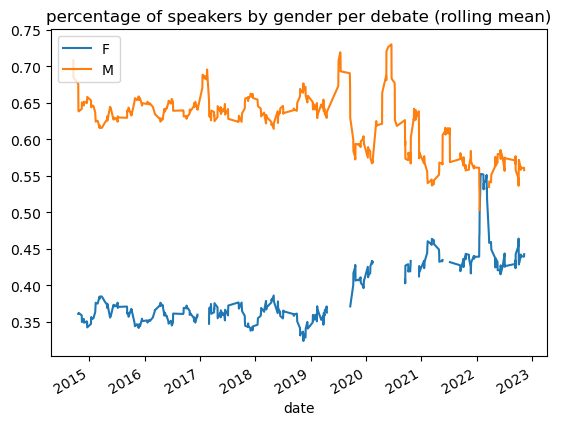

In [35]:
#PLOT
df_gender_rolling_mean_pct.plot(title='percentage of speakers by gender per debate (rolling mean)', kind='line').legend(loc='upper left')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/pct_per-debate_by-gender')

In [36]:
df_abs_rolling_mean = df_gender_pct.unstack()

### % of women/men per year

In [37]:
df_gender_yr = df_gender
df_gender_yr = df_gender_yr.assign(YYYY = df_gender_yr.mmYYYY)
df_gender_yr['YYYY'] = df_gender_yr.YYYY.dt.strftime('%Y')
df_gender_yr.head()

date gender EU political group country language     mmYYYY  YYYY
0 2014-07-01      M                NaN     NaN       it 2014-07-01  2014
2 2014-07-01      M                NaN     NaN       en 2014-07-01  2014
3 2014-07-01      F                NaN     NaN       en 2014-07-01  2014
4 2014-07-01      M                NaN     NaN       de 2014-07-01  2014
5 2014-07-01      F                NaN     NaN       de 2014-07-01  2014

In [38]:
df_gender_yr_grpd = df_gender_yr.groupby(['YYYY', 'gender'])['gender'].count().reset_index(name='count_by_gender')
df_gender_yr_grpd.head()

YYYY gender  count_by_gender
0  2014      F             4659
1  2014      M             8531
2  2015      F            28187
3  2015      M            49848
4  2016      F            33031

In [39]:
df_gender_yr_pct = df_gender_yr_grpd.groupby(['YYYY','gender']).sum()
df_gender_yr_pct = df_gender_yr_pct.div(df_gender_yr_pct.sum(level=0), level=0)
df_gender_yr_pct

C:\Users\Katharina\AppData\Local\Temp\ipykernel_11624\2921655992.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_gender_yr_pct = df_gender_yr_pct.div(df_gender_yr_pct.sum(level=0), level=0)


count_by_gender
YYYY gender                 
2014 F              0.353222
     M              0.646778
2015 F              0.361210
     M              0.638790
2016 F              0.360353
     M              0.639647
2017 F              0.358556
     M              0.641444
2018 F              0.350129
     M              0.649871
2019 F              0.381474
     M              0.618526
2020 F              0.420169
     M              0.579831
2021 F              0.430642
     M              0.569358
2022 F              0.442582
     M              0.557418

In [40]:
#validity check: returns all debates with count_by_gender value greater than xx
#df_gender_pct[df_gender_pct.count_by_gender > 0.89]
#df[df.date == '2020-10-23']
#df_gender_yr_pct_1

In [41]:
df_gender_yr_pct_1 = df_gender_yr_pct.unstack()

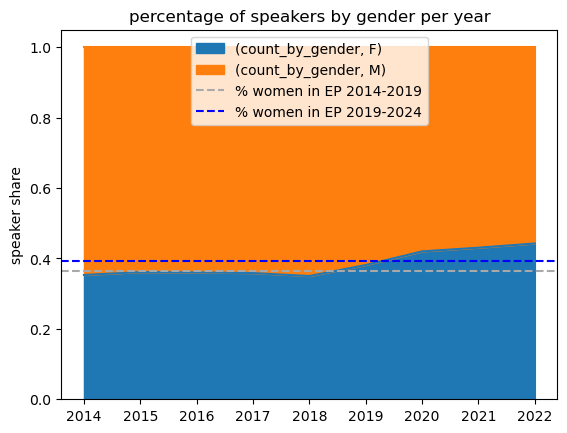

In [42]:
p = df_gender_yr_pct_1.plot(title='percentage of speakers by gender per year', kind='area', xlabel='', ylabel= 'speaker share')#.legend(loc='upper left')
p.axhline(y = 0.364, color = 'darkgray', linestyle = 'dashed', label = "% women in EP 2014-2019")
p.axhline(y = 0.393, color = 'b', linestyle = 'dashed', label = "% women in EP 2019-2024")
p.legend(loc = 'upper center')

#p.figure.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/pct_per-year_by-gender2.png')

MEPs by gender
https://www.europarl.europa.eu/news/en/headlines/society/20190226STO28804/women-in-the-european-parliament-infographics
2014-2019: 36.4% women 
2019-2024: 39.3%
for above figure

In [43]:
# renaming political groups for better fitting into plot
df_gender_party1 = df_gender

df_gender_party1["EU political group"] = df_gender_party1["EU political group"].replace("European Conservatives and Reformists Group", "Conservatives")
df_gender_party1["EU political group"] = df_gender_party1["EU political group"].replace("Group of the European People's Party (Christian Democrats)", "Christian Democrats")
df_gender_party1["EU political group"] = df_gender_party1["EU political group"].replace("Group of the Greens/European Free Alliance", "Greens")
df_gender_party1["EU political group"] = df_gender_party1["EU political group"].replace("Group of the Progressive Alliance of Socialists and Democrats in the European Parliament", "Socialists")
df_gender_party1["EU political group"] = df_gender_party1["EU political group"].replace("Identity and Democracy Group", "Identity")
df_gender_party1["EU political group"] = df_gender_party1["EU political group"].replace("Non-attached Members", "Non-attached Members")
df_gender_party1["EU political group"] = df_gender_party1["EU political group"].replace("Renew Europe Group", "Renew Europe")
df_gender_party1["EU political group"] = df_gender_party1["EU political group"].replace("The Left group in the European Parliament - GUE/NGL", "Lefts")


df_gender_party1.head()

date gender EU political group country language     mmYYYY
0 2014-07-01      M                NaN     NaN       it 2014-07-01
2 2014-07-01      M                NaN     NaN       en 2014-07-01
3 2014-07-01      F                NaN     NaN       en 2014-07-01
4 2014-07-01      M                NaN     NaN       de 2014-07-01
5 2014-07-01      F                NaN     NaN       de 2014-07-01

In [44]:
df_gender_party1a = df_gender_party1.groupby(['EU political group'])['gender'].value_counts()

In [45]:
df_gender_party1a

EU political group    gender
Christian Democrats   M         23495
                      F         11813
Conservatives         M          5467
                      F          1540
Greens                M          4456
                      F          3217
Identity              M          5629
                      F          2045
Lefts                 M          4474
                      F          2512
Non-attached Members  M          5936
                      F          2393
Renew Europe          F          5224
                      M          5132
Socialists            M         13657
                      F         11495
Name: gender, dtype: int64

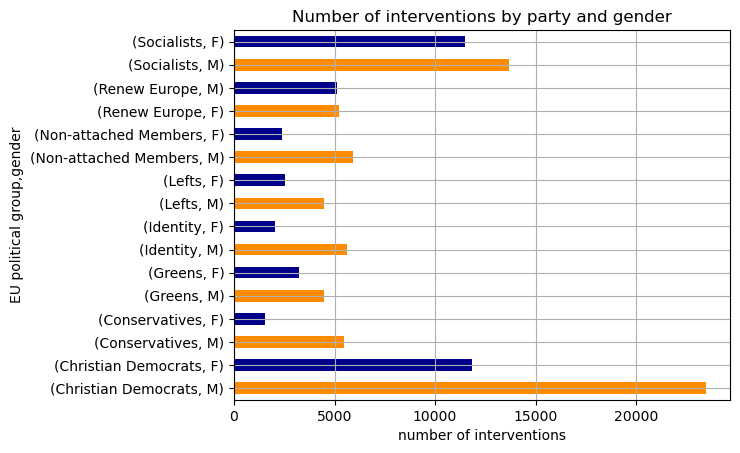

In [120]:
df_gender_party1a.plot.barh(title='Number of interventions by party and gender', color =['darkorange', 'darkblue', 'darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue'], xlabel = 'number of interventions')
plt.grid()

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/interventions-by-party-and-gender.png',bbox_inches='tight')

#### same plot separating legislature periods

In [47]:
df_gender_party1_8 = df_gender_party1[df_gender_party1["mmYYYY"] < '2019-07-01']
df_gender_party1_8.head()

date gender EU political group country language     mmYYYY
0 2014-07-01      M                NaN     NaN       it 2014-07-01
2 2014-07-01      M                NaN     NaN       en 2014-07-01
3 2014-07-01      F                NaN     NaN       en 2014-07-01
4 2014-07-01      M                NaN     NaN       de 2014-07-01
5 2014-07-01      F                NaN     NaN       de 2014-07-01

In [48]:
df_gender_party1_9 = df_gender_party1[df_gender_party1["mmYYYY"] > '2019-07-01']
df_gender_party1_9.head()

date gender EU political group country language     mmYYYY
228865 2019-09-16      M                NaN     NaN       it 2019-09-01
228866 2019-09-16      M                NaN     NaN       it 2019-09-01
228867 2019-09-16      M                NaN     NaN       it 2019-09-01
228868 2019-09-16      F                NaN     NaN       en 2019-09-01
228869 2019-09-16      M                NaN     NaN       it 2019-09-01

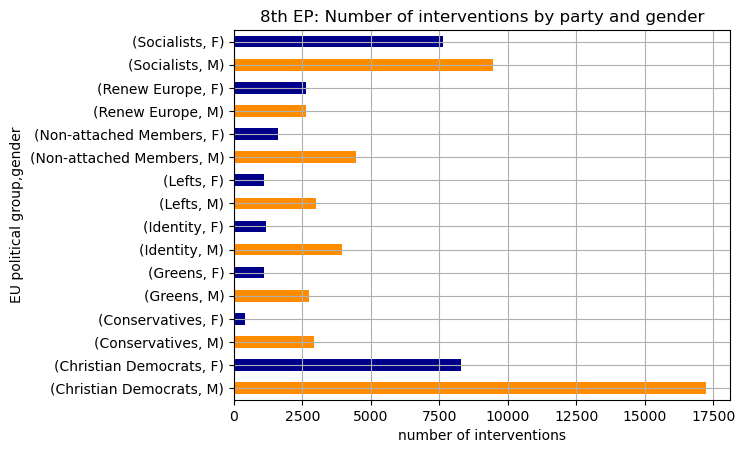

In [122]:
df_gender_party1_8a = df_gender_party1_8.groupby(['EU political group'])['gender'].value_counts()

df_gender_party1_8a.plot.barh(title='8th EP: Number of interventions by party and gender', color =['darkorange', 'darkblue', 'darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue'] , xlabel = 'number of interventions')
plt.grid()
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/8th_EP_interventions-by-party-and-gender.png',bbox_inches='tight')

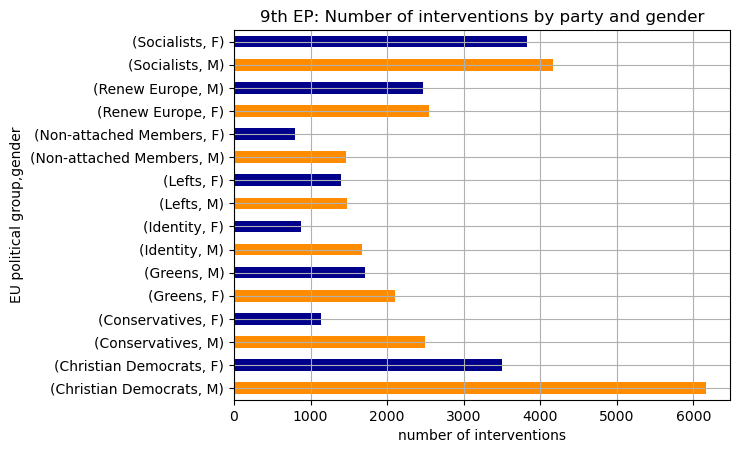

In [124]:
df_gender_party1_9a = df_gender_party1_9.groupby(['EU political group'])['gender'].value_counts()

df_gender_party1_9a.plot.barh(title='9th EP: Number of interventions by party and gender', color =['darkorange', 'darkblue', 'darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue','darkorange', 'darkblue'], xlabel = 'number of interventions')
plt.grid()
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/9th_EP_interventions-by-party-and-gender.png',bbox_inches='tight')

## number of interventions per debate

In [51]:
occur = df.groupby(['debate_id']).size()

In [52]:
occur#.describe()

debate_id
20140701.EN     22
20140702.EN    140
20140703.EN      1
20140714.EN     43
20140715.EN    304
              ... 
20221018.EN    390
20221019.EN    335
20221020.EN    103
20221109.EN    241
20221110.EN     83
Length: 463, dtype: int64

<AxesSubplot: title={'center': 'Number of interventions per debate'}, xlabel='debate_id'>

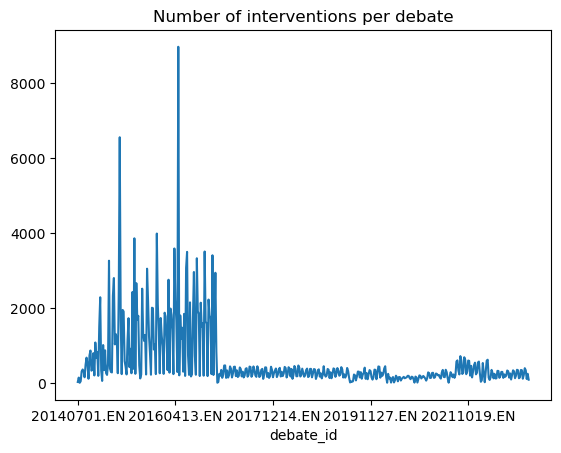

In [53]:
occur.plot(title='Number of interventions per debate')

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/interventions-per-debate.png')

In [54]:
# change in occurance: 17.01.2017
# max 28.04.2016 (8.963) - 29.04.2015 (6576)

fig = px.bar(occur, title="Number of interventions per debate")
fig.update_layout(
    xaxis_title = "debate",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

## number of speakers (by gender)

In [55]:
pd.unique(df.speaker_id)

array(['4436', '28481', '97017', ..., '197835', '197799', '197637'],
      dtype=object)

In [56]:
df_speaker = df
df_speaker = df_speaker.assign(mmYYYY = df_speaker.date)
df_speaker['mmYYYY'] = df_speaker.mmYYYY.dt.strftime('%m%Y')
df_speaker['mmYYYY'] = pd.to_datetime(df_speaker['mmYYYY'], format='%m%Y')

In [57]:
speakers = df_speaker[['debate_id','speaker_id', 'gender', 'EU political group', 'mmYYYY']]
speakers

debate_id speaker_id gender  \
0       20140701.EN       4436      M   
2       20140701.EN      28481      M   
3       20140701.EN      97017      F   
4       20140701.EN       1911      M   
5       20140701.EN     124825      F   
...             ...        ...    ...   
275090  20220216.EN     197756      F   
275091  20220216.EN     197654      M   
275092  20220216.EN      28615      M   
275094  20220216.EN      28615      M   
275095  20220216.EN      28615      M   

                                       EU political group     mmYYYY  
0                                                     NaN 2014-07-01  
2                                                     NaN 2014-07-01  
3                                                     NaN 2014-07-01  
4                                                     NaN 2014-07-01  
5                                                     NaN 2014-07-01  
...                                                   ...        ...  
275090  Group of the Progressive Alliance of Socialist... 2022-02-01  
275091         Group of the Greens/European Free Alliance 2022-02-01  
275092        European Conservatives and Reformists Group 2022-02-01  
275094        European Conservatives and Reformists Group 2022-02-01  
275095        European Conservatives and Reformists Group 2022-02-01  

[260651 rows x 5 columns]

In [58]:
unique_speakers=speakers.groupby('mmYYYY')['speaker_id'].nunique()
unique_speakers

mmYYYY
2014-07-01    441
2014-09-01    480
2014-10-01    525
2014-11-01    603
2014-12-01    549
             ... 
2022-06-01    469
2022-07-01    409
2022-09-01    429
2022-10-01    520
2022-11-01    186
Name: speaker_id, Length: 90, dtype: int64

<AxesSubplot: title={'center': 'number of unique speakers per month'}, xlabel='mmYYYY'>

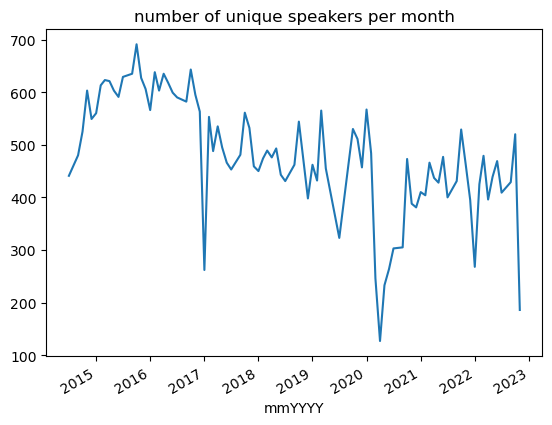

In [59]:
unique_speakers.plot(title='number of unique speakers per month')

In [60]:
unique_speakers2=speakers.groupby('debate_id')['speaker_id'].nunique()
unique_speakers2

debate_id
20140701.EN     10
20140702.EN    105
20140703.EN      1
20140714.EN     34
20140715.EN    217
              ... 
20221018.EN    255
20221019.EN    229
20221020.EN     63
20221109.EN    151
20221110.EN     55
Name: speaker_id, Length: 463, dtype: int64

<AxesSubplot: title={'center': 'number of unique speakers per debate'}, xlabel='debate_id'>

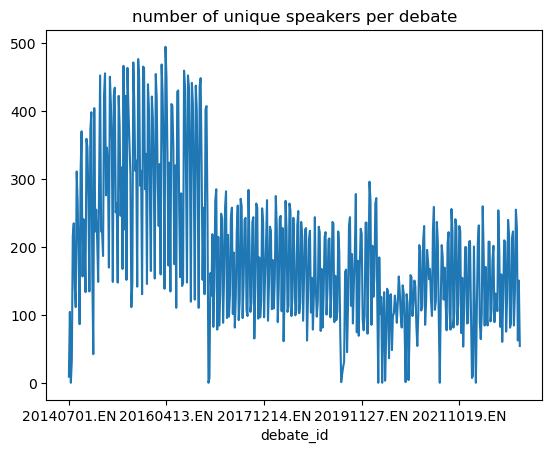

In [61]:
unique_speakers2.plot(title='number of unique speakers per debate')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/speakers-per-debate.png')

In [62]:
unique_speakers3=speakers.groupby(['debate_id', 'gender'])['speaker_id'].nunique()
unique_speakers3

debate_id    gender
20140701.EN  F          3
             M          7
20140702.EN  F         33
             M         72
20140703.EN  M          1
                       ..
20221020.EN  M         34
20221109.EN  F         56
             M         95
20221110.EN  F         28
             M         27
Name: speaker_id, Length: 917, dtype: int64

<AxesSubplot: title={'center': 'number of unique speakers per debate (incl gender)'}, xlabel='debate_id'>

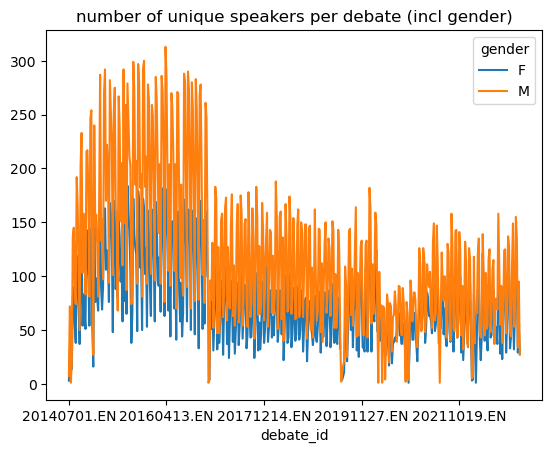

In [63]:
unique_speakers3 = unique_speakers3.unstack()
unique_speakers3.plot(title='number of unique speakers per debate (incl gender)')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/speakers-per-debate-gender.png')

In [64]:
fig = px.bar(unique_speakers2, title="number of unique speakers per debate")
fig.update_layout(
    xaxis_title = "debate",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [118]:
fig = px.bar(unique_speakers3, title="number of unique speakers per debate (by gender)", color_discrete_sequence=[
                 "darkblue", "darkorange"])
fig.update_layout(
    xaxis_title = "debate",
    yaxis_title = "unique speaker frequency",
    title_x = 0.5, 
    showlegend = True,
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

total number of speakers per debate

In [66]:
not_unique_speakers=speakers.groupby(['debate_id', 'gender'])['speaker_id'].count()

In [67]:
not_unique_speakers_1 = not_unique_speakers.unstack()

In [126]:
fig = px.bar(not_unique_speakers_1, title="number of total speakers per debate (by gender)", color_discrete_sequence=[
                 "darkblue", "darkorange"])
fig.update_layout(
    xaxis_title = "debate",
    yaxis_title = "speaker frequency",
    title_x = 0.5, 
    showlegend = True,
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

In [69]:
df_debates = df_speaker
df_debates = df_debates.assign(YYYY = df_debates.mmYYYY)
df_debates['YYYY'] = df_debates.YYYY.dt.strftime('%Y')
df_debates.head()

int_id    debate_id       date             speaker  is_mep  \
0  2-008-000  20140701.EN 2014-07-01          Presidente    True   
2  2-010-000  20140701.EN 2014-07-01        Sajjad Karim    True   
3  2-011-000  20140701.EN 2014-07-01      Ulrike Lunacek    True   
4  2-013-000  20140701.EN 2014-07-01       Martin Schulz    True   
5  2-014-000  20140701.EN 2014-07-01  Beatrix von Storch    True   

                                                text speaker_id role  party  \
0   Ringrazio il maestro e tutta l'orchestra. Ric...       4436  NaN    NaN   
2   Mr President, I rise to speak with a sense of...      28481  NaN    NaN   
3   Mr President, firstly let me welcome all the ...      97017  NaN    NaN   
4   Herr Präsident, meine sehr geehrten Damen und...       1911  NaN    NaN   
5   Herr Präsident! Mein Name ist Beatrix von Sto...     124825  NaN    NaN   

                                     text_translated  ...      nationalty  \
0  I thank the master and the whole orchestra.I r...  ...           Italy   
2  Mr President, I rise to speak with a sense of ...  ...  United Kingdom   
3  Mr President, firstly let me welcome all the n...  ...         Austria   
4  Mr. President, my dear ladies and gentlemen, d...  ...         Germany   
5  Mister President!My name is Beatrix von Storch...  ...         Germany   

  gender birth_year       birth_place  \
0      M       1958       Lauria (PZ)   
2      M       1970        Lancashire   
3      F       1957  Krems a.d. Donau   
4      M       1955          Hehlrath   
5      F       1971            Lübeck   

                                    political_groups  \
0  20-07-1999 / 19-07-2004 : Group of the Party o...   
2  20-07-2004 / 11-12-2007 : Group of the Allianc...   
3  14-07-2009 / 04-02-2013 : Group of the Greens/...   
4  19-07-1994 / 19-07-1999 : Group of the Party o...   
5  01-07-2014 / 07-04-2016 : European Conservativ...   

                                    national_parties  YYYY  debate_year  \
0  20-07-1999 / 19-07-2004 : Democratici di Sinis...  2014         2014   
2  20-07-2004 / 13-07-2009 : UK Independence Part...  2014         2014   
3  14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...  2014         2014   
4  19-07-1994 / 19-07-1999 : Sozialdemokratische ...  2014         2014   
5  01-07-2014 / 23-10-2017 : Alternative für Deut...  2014         2014   

  age_atDebate     mmYYYY  
0           56 2014-07-01  
2           44 2014-07-01  
3           57 2014-07-01  
4           59 2014-07-01  
5           43 2014-07-01  

[5 rows x 25 columns]

In [70]:
df_debates_age = df_debates.assign(debate_year=df_debates.YYYY.astype(int))

In [71]:
unique_debates_prep = df_debates_age[df_debates_age['debate_year']>2014]

<AxesSubplot: title={'center': 'number of debates per year'}, ylabel='debate frequency'>

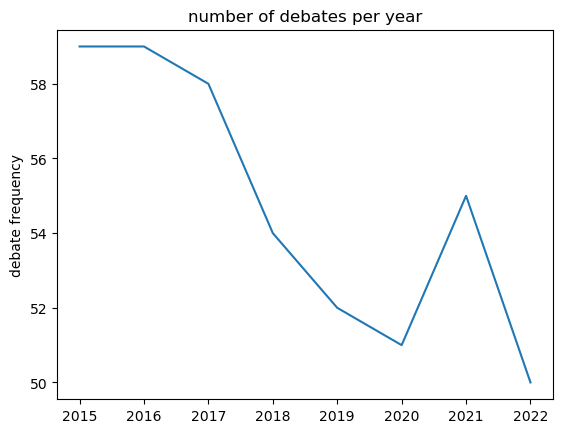

In [72]:
unique_debates=unique_debates_prep.groupby('YYYY')['debate_id'].nunique()
unique_debates.plot(title='number of debates per year', xlabel='', ylabel='debate frequency')#

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/number-of-debates.png')

In [73]:
unique_debates

YYYY
2015    59
2016    59
2017    58
2018    54
2019    52
2020    51
2021    55
2022    50
Name: debate_id, dtype: int64

 #### seasonal - by month

In [74]:
df_debates_age.head()

int_id    debate_id       date             speaker  is_mep  \
0  2-008-000  20140701.EN 2014-07-01          Presidente    True   
2  2-010-000  20140701.EN 2014-07-01        Sajjad Karim    True   
3  2-011-000  20140701.EN 2014-07-01      Ulrike Lunacek    True   
4  2-013-000  20140701.EN 2014-07-01       Martin Schulz    True   
5  2-014-000  20140701.EN 2014-07-01  Beatrix von Storch    True   

                                                text speaker_id role  party  \
0   Ringrazio il maestro e tutta l'orchestra. Ric...       4436  NaN    NaN   
2   Mr President, I rise to speak with a sense of...      28481  NaN    NaN   
3   Mr President, firstly let me welcome all the ...      97017  NaN    NaN   
4   Herr Präsident, meine sehr geehrten Damen und...       1911  NaN    NaN   
5   Herr Präsident! Mein Name ist Beatrix von Sto...     124825  NaN    NaN   

                                     text_translated  ...      nationalty  \
0  I thank the master and the whole orchestra.I r...  ...           Italy   
2  Mr President, I rise to speak with a sense of ...  ...  United Kingdom   
3  Mr President, firstly let me welcome all the n...  ...         Austria   
4  Mr. President, my dear ladies and gentlemen, d...  ...         Germany   
5  Mister President!My name is Beatrix von Storch...  ...         Germany   

  gender birth_year       birth_place  \
0      M       1958       Lauria (PZ)   
2      M       1970        Lancashire   
3      F       1957  Krems a.d. Donau   
4      M       1955          Hehlrath   
5      F       1971            Lübeck   

                                    political_groups  \
0  20-07-1999 / 19-07-2004 : Group of the Party o...   
2  20-07-2004 / 11-12-2007 : Group of the Allianc...   
3  14-07-2009 / 04-02-2013 : Group of the Greens/...   
4  19-07-1994 / 19-07-1999 : Group of the Party o...   
5  01-07-2014 / 07-04-2016 : European Conservativ...   

                                    national_parties  YYYY  debate_year  \
0  20-07-1999 / 19-07-2004 : Democratici di Sinis...  2014         2014   
2  20-07-2004 / 13-07-2009 : UK Independence Part...  2014         2014   
3  14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...  2014         2014   
4  19-07-1994 / 19-07-1999 : Sozialdemokratische ...  2014         2014   
5  01-07-2014 / 23-10-2017 : Alternative für Deut...  2014         2014   

  age_atDebate     mmYYYY  
0           56 2014-07-01  
2           44 2014-07-01  
3           57 2014-07-01  
4           59 2014-07-01  
5           43 2014-07-01  

[5 rows x 25 columns]

In [75]:
df_seasonal = df_debates_age
df_seasonal =df_seasonal.assign(mm = df_seasonal['mmYYYY'].dt.month)
df_seasonal.head()

int_id    debate_id       date             speaker  is_mep  \
0  2-008-000  20140701.EN 2014-07-01          Presidente    True   
2  2-010-000  20140701.EN 2014-07-01        Sajjad Karim    True   
3  2-011-000  20140701.EN 2014-07-01      Ulrike Lunacek    True   
4  2-013-000  20140701.EN 2014-07-01       Martin Schulz    True   
5  2-014-000  20140701.EN 2014-07-01  Beatrix von Storch    True   

                                                text speaker_id role  party  \
0   Ringrazio il maestro e tutta l'orchestra. Ric...       4436  NaN    NaN   
2   Mr President, I rise to speak with a sense of...      28481  NaN    NaN   
3   Mr President, firstly let me welcome all the ...      97017  NaN    NaN   
4   Herr Präsident, meine sehr geehrten Damen und...       1911  NaN    NaN   
5   Herr Präsident! Mein Name ist Beatrix von Sto...     124825  NaN    NaN   

                                     text_translated  ... gender birth_year  \
0  I thank the master and the whole orchestra.I r...  ...      M       1958   
2  Mr President, I rise to speak with a sense of ...  ...      M       1970   
3  Mr President, firstly let me welcome all the n...  ...      F       1957   
4  Mr. President, my dear ladies and gentlemen, d...  ...      M       1955   
5  Mister President!My name is Beatrix von Storch...  ...      F       1971   

        birth_place                                   political_groups  \
0       Lauria (PZ)  20-07-1999 / 19-07-2004 : Group of the Party o...   
2        Lancashire  20-07-2004 / 11-12-2007 : Group of the Allianc...   
3  Krems a.d. Donau  14-07-2009 / 04-02-2013 : Group of the Greens/...   
4          Hehlrath  19-07-1994 / 19-07-1999 : Group of the Party o...   
5            Lübeck  01-07-2014 / 07-04-2016 : European Conservativ...   

                                    national_parties  YYYY debate_year  \
0  20-07-1999 / 19-07-2004 : Democratici di Sinis...  2014        2014   
2  20-07-2004 / 13-07-2009 : UK Independence Part...  2014        2014   
3  14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...  2014        2014   
4  19-07-1994 / 19-07-1999 : Sozialdemokratische ...  2014        2014   
5  01-07-2014 / 23-10-2017 : Alternative für Deut...  2014        2014   

   age_atDebate     mmYYYY mm  
0            56 2014-07-01  7  
2            44 2014-07-01  7  
3            57 2014-07-01  7  
4            59 2014-07-01  7  
5            43 2014-07-01  7  

[5 rows x 26 columns]

<AxesSubplot: title={'center': 'number of debates - seasonal'}, xlabel='mm'>

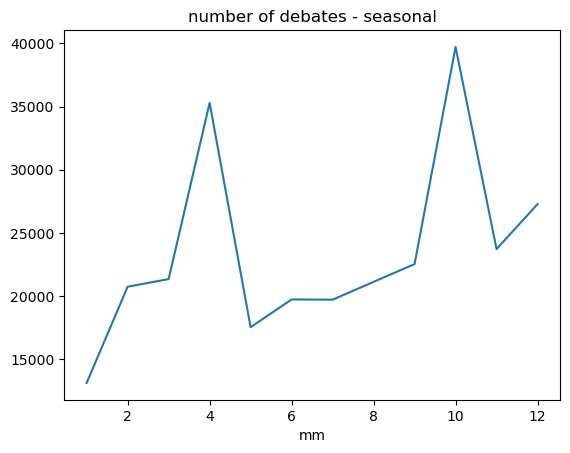

In [76]:
# %ualer Anteil an den jeweiligen Jahren

unique_debates_seasonal=df_seasonal.groupby('mm')['debate_id'].count()
unique_debates_seasonal.plot(title='number of debates - seasonal')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/number-of-debates_seasonal.png')

In [77]:
df_seasonal_check = df_seasonal[df_seasonal['mm'] == 10]
df_seasonal_check

int_id    debate_id       date                 speaker  is_mep  \
3118     1-004-000  20141020.EN 2014-10-20           Der Präsident    True   
3119     1-006-000  20141020.EN 2014-10-20           Der Präsident    True   
3120     1-008-000  20141020.EN 2014-10-20           Der Präsident    True   
3121     1-009-000  20141020.EN 2014-10-20            Paul Nuttall    True   
3122     1-010-000  20141020.EN 2014-10-20           Der Präsident    True   
...            ...          ...        ...                     ...     ...   
271564  4-139-0000  20211021.EN 2021-10-21              Clare Daly    True   
271565  4-140-0000  20211021.EN 2021-10-21  Mick Wallace (The Left    True   
271567  4-142-0000  20211021.EN 2021-10-21           Der Präsident    True   
271568  4-152-0000  20211021.EN 2021-10-21           Der Präsident    True   
271569  4-157-0000  20211021.EN 2021-10-21           Der Präsident    True   

                                                     text speaker_id  \
3118     Ich erkläre die am Donnerstag, dem 18. Septem...       1911   
3119     Meine Damen und Herren! Angesichts der aktuel...       1911   
3120     Meine Damen und Herren! Ich möchte Sie darübe...       1911   
3121     Mr President, although we have changed – or s...      96805   
3122     Die Bildung von Fraktionen erfolgt auf der Gr...       1911   
...                                                   ...        ...   
271564   Mr President, there’s no doubt about it, our ...     197731   
271565   Mr President, the structure of philanthropy a...     197817   
271567   Vielen Dank, Frau Kommissarin McGuinness. Ich...       2323   
271568   Die Protokolle der Sitzungen vom 18. bis 21. ...       2323   
271569   Ich erkläre die Sitzungsperiode des Europäisc...       2323   

                               role  party  \
3118                            NaN    NaN   
3119                            NaN    NaN   
3120                            NaN    NaN   
3121                            NaN    NaN   
3122                            NaN    NaN   
...                             ...    ...   
271564  on behalf of The Left Group    NaN   
271565                          NaN    NaN   
271567                          NaN    NaN   
271568                          NaN    NaN   
271569                          NaN    NaN   

                                          text_translated  ... gender  \
3118    I will declare the session period interrupted ...  ...      M   
3119    Ladies and gentlemen!In view of the current si...  ...      M   
3120    Ladies and gentlemen!I would like to inform yo...  ...      M   
3121    Mr President, although we have changed – or sh...  ...      M   
3122    Groups are formed on the basis of the rules of...  ...      M   
...                                                   ...  ...    ...   
271564  Mr President, there’s no doubt about it, our w...  ...      F   
271565  Mr President, the structure of philanthropy ar...  ...      M   
271567  Thank you very much, Ms. McGuinness.I think bo...  ...      M   
271568  The protocols of the meetings from October 18 ...  ...      M   
271569  I declare the European Parliament's session pe...  ...      M   

       birth_year                birth_place  \
3118         1955                   Hehlrath   
3119         1955                   Hehlrath   
3120         1955                   Hehlrath   
3121         1976                  Liverpool   
3122         1955                   Hehlrath   
...           ...                        ...   
271564       1968                     Dublin   
271565       1955                    Wexford   
271567       1957  Stuttgart - Bad Cannstatt   
271568       1957  Stuttgart - Bad Cannstatt   
271569       1957  Stuttgart - Bad Cannstatt   

                                         political_groups  \
3118    19-07-1994 / 19-07-1999 : Group of the Party o...   
3119    19-07-1994 / 19-07-1999 : Group of the Party o...   
3120    19-07-1994 /

## AGE

In [78]:
#df_summed_gender_year
df_debates_age_1 = df_debates_age.drop(columns=['YYYY'])
df_debates_age_1 = df_debates_age_1[df_debates_age_1.birth_year != 0] #removing all rows (7940) with birth year = 0
df_debates_age_1 = df_debates_age_1.assign(age_atDebate = df_debates_age_1.debate_year - df_debates_age_1.birth_year)
df_debates_age_1.head()

int_id    debate_id       date             speaker  is_mep  \
0  2-008-000  20140701.EN 2014-07-01          Presidente    True   
2  2-010-000  20140701.EN 2014-07-01        Sajjad Karim    True   
3  2-011-000  20140701.EN 2014-07-01      Ulrike Lunacek    True   
4  2-013-000  20140701.EN 2014-07-01       Martin Schulz    True   
5  2-014-000  20140701.EN 2014-07-01  Beatrix von Storch    True   

                                                text speaker_id role  party  \
0   Ringrazio il maestro e tutta l'orchestra. Ric...       4436  NaN    NaN   
2   Mr President, I rise to speak with a sense of...      28481  NaN    NaN   
3   Mr President, firstly let me welcome all the ...      97017  NaN    NaN   
4   Herr Präsident, meine sehr geehrten Damen und...       1911  NaN    NaN   
5   Herr Präsident! Mein Name ist Beatrix von Sto...     124825  NaN    NaN   

                                     text_translated  ...  \
0  I thank the master and the whole orchestra.I r...  ...   
2  Mr President, I rise to speak with a sense of ...  ...   
3  Mr President, firstly let me welcome all the n...  ...   
4  Mr. President, my dear ladies and gentlemen, d...  ...   
5  Mister President!My name is Beatrix von Storch...  ...   

  national political group      nationalty gender birth_year  \
0                      NaN           Italy      M       1958   
2                      NaN  United Kingdom      M       1970   
3                      NaN         Austria      F       1957   
4                      NaN         Germany      M       1955   
5                      NaN         Germany      F       1971   

        birth_place                                   political_groups  \
0       Lauria (PZ)  20-07-1999 / 19-07-2004 : Group of the Party o...   
2        Lancashire  20-07-2004 / 11-12-2007 : Group of the Allianc...   
3  Krems a.d. Donau  14-07-2009 / 04-02-2013 : Group of the Greens/...   
4          Hehlrath  19-07-1994 / 19-07-1999 : Group of the Party o...   
5            Lübeck  01-07-2014 / 07-04-2016 : European Conservativ...   

                                    national_parties  debate_year  \
0  20-07-1999 / 19-07-2004 : Democratici di Sinis...         2014   
2  20-07-2004 / 13-07-2009 : UK Independence Part...         2014   
3  14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...         2014   
4  19-07-1994 / 19-07-1999 : Sozialdemokratische ...         2014   
5  01-07-2014 / 23-10-2017 : Alternative für Deut...         2014   

  age_atDebate     mmYYYY  
0           56 2014-07-01  
2           44 2014-07-01  
3           57 2014-07-01  
4           59 2014-07-01  
5           43 2014-07-01  

[5 rows x 24 columns]

In [79]:
df_debates_age_1["age_atDebate"].describe()

count    260651.000000
mean         51.339630
std          10.572538
min          21.000000
25%          43.000000
50%          52.000000
75%          59.000000
max          93.000000
Name: age_atDebate, dtype: float64

<AxesSubplot: title={'center': 'age_atDebate'}, xlabel='gender'>

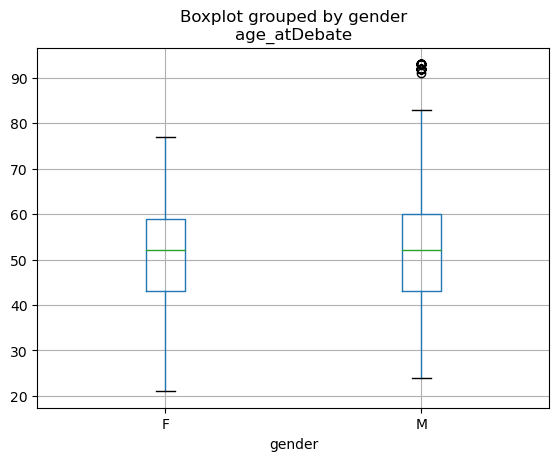

In [80]:
df_debates_age_1.boxplot(column="age_atDebate",by="gender")

In [81]:
# Age MALES
df_agebygender = df_debates_age_1.set_index('gender')
df_agebygender_male = df_agebygender.loc['M', 'age_atDebate']
df_agebygender_male.describe()

count    164106.000000
mean         51.607821
std          10.756473
min          24.000000
25%          43.000000
50%          52.000000
75%          60.000000
max          93.000000
Name: age_atDebate, dtype: float64

In [82]:
# Age FEMALES
df_agebygender = df_debates_age_1.set_index('gender')
df_agebygender_female = df_agebygender.loc['F', 'age_atDebate']
df_agebygender_female.describe()

count    96545.000000
mean        50.883764
std         10.236265
min         21.000000
25%         43.000000
50%         52.000000
75%         59.000000
max         77.000000
Name: age_atDebate, dtype: float64

Text(0, 0.5, 'age')

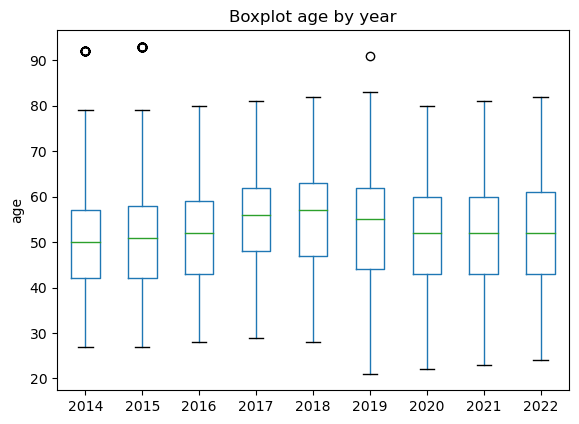

In [83]:
#boxplots age

df_debates_age_1.boxplot(by='debate_year', column=['age_atDebate'], grid=False)
plt.title('Boxplot age by year')
plt.suptitle('')
plt.xlabel('')
plt.ylabel('age')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/boxplot_age-by-year.png')

In [84]:
df_debates_age_1

int_id    debate_id       date             speaker  is_mep  \
0        2-008-000  20140701.EN 2014-07-01          Presidente    True   
2        2-010-000  20140701.EN 2014-07-01        Sajjad Karim    True   
3        2-011-000  20140701.EN 2014-07-01      Ulrike Lunacek    True   
4        2-013-000  20140701.EN 2014-07-01       Martin Schulz    True   
5        2-014-000  20140701.EN 2014-07-01  Beatrix von Storch    True   
...            ...          ...        ...                 ...     ...   
275090  3-367-0000  20220216.EN 2022-02-16            Vera Tax    True   
275091  3-368-0000  20220216.EN 2022-02-16        Ciarán Cuffe    True   
275092  3-369-0000  20220216.EN 2022-02-16      Sēdes vadītājs    True   
275094  3-371-0000  20220216.EN 2022-02-16      Sēdes vadītājs    True   
275095  3-380-0000  20220216.EN 2022-02-16      Sēdes vadītājs    True   

                                                     text speaker_id role  \
0        Ringrazio il maestro e tutta l'orchestra. Ric...       4436  NaN   
2        Mr President, I rise to speak with a sense of...      28481  NaN   
3        Mr President, firstly let me welcome all the ...      97017  NaN   
4        Herr Präsident, meine sehr geehrten Damen und...       1911  NaN   
5        Herr Präsident! Mein Name ist Beatrix von Sto...     124825  NaN   
...                                                   ...        ...  ...   
275090   Voorzitter, het huidige tolsysteem in de EU i...     197756  NaN   
275091   A Uachtarán, I dtús báire, bhí an togra Eurov...     197654  NaN   
275092   Liels paldies! Un tiešām gandarījums, ka Eiro...      28615  NaN   
275094   Debates ir beigušās par šo tematu, un es grib...      28615  NaN   
275095   Sēde ir noslēgusies, un tā atsāksies rītdien,...      28615  NaN   

        party                                    text_translated  ...  \
0         NaN  I thank the master and the whole orchestra.I r...  ...   
2         NaN  Mr President, I rise to speak with a sense of ...  ...   
3         NaN  Mr President, firstly let me welcome all the n...  ...   
4         NaN  Mr. President, my dear ladies and gentlemen, d...  ...   
5         NaN  Mister President!My name is Beatrix von Storch...  ...   
...       ...                                                ...  ...   
275090    NaN  Chairman, the current toll system in the EU is...  ...   
275091    NaN  His president, initially, was the Eurovignette...  ...   
275092    NaN  Thank you very much!And indeed, the European U...  ...   
275094    NaN  The debate has ended on this topic, and I want...  ...   
275095    NaN  The meeting is over and will resume tomorrow, ...  ...   

                                 national political group      nationalty  \
0                                                     NaN           Italy   
2                                                     NaN  United Kingdom   
3                                                     NaN         Austria   
4                                                     NaN         Germany   
5                                                     NaN         Germany   
...                                                   ...             ...   
275090                               Partij van de Arbeid     Netherlands   
275091                                        Green Party         Ireland   
275092  Nacionālā apvienība "Visu Latvijai!"-"Tēvzemei...          Latvia   
275094  Nacionālā apvienība "Visu Latvijai!"-"Tēvzemei...          Latvia   
275095  Nacionālā apvienība "Visu Latvijai!"-"Tēvzemei...          Latvia   

       gender birth_year       birth_place  \
0           M       1958       Lauria (PZ)   
2           M       1970        Lancashire   
3           F       1957  Krems a.d. Donau   
4           M       1955          Hehlrath   
5           F       1971            Lübeck   
...       ...        ...               ...   
275090      F       1972             Venlo   
275091      M       1963    

In [85]:
df_boxplot = df_debates_age_1

df_boxplot["EU political group"] = df_boxplot["EU political group"].replace("European Conservatives and Reformists Group", "Conservatives")
df_boxplot["EU political group"] = df_boxplot["EU political group"].replace("Group of the European People's Party (Christian Democrats)", "Christian Democrats")
df_boxplot["EU political group"] = df_boxplot["EU political group"].replace("Group of the Greens/European Free Alliance", "Greens")
df_boxplot["EU political group"] = df_boxplot["EU political group"].replace("Group of the Progressive Alliance of Socialists and Democrats in the European Parliament", "Socialists")
df_boxplot["EU political group"] = df_boxplot["EU political group"].replace("Identity and Democracy Group", "Identity")
df_boxplot["EU political group"] = df_boxplot["EU political group"].replace("Non-attached Members", "Non-attached Members")
df_boxplot["EU political group"] = df_boxplot["EU political group"].replace("Renew Europe Group", "Renew Europe")
df_boxplot["EU political group"] = df_boxplot["EU political group"].replace("The Left group in the European Parliament - GUE/NGL", "Lefts")


df_boxplot.head()

int_id    debate_id       date             speaker  is_mep  \
0  2-008-000  20140701.EN 2014-07-01          Presidente    True   
2  2-010-000  20140701.EN 2014-07-01        Sajjad Karim    True   
3  2-011-000  20140701.EN 2014-07-01      Ulrike Lunacek    True   
4  2-013-000  20140701.EN 2014-07-01       Martin Schulz    True   
5  2-014-000  20140701.EN 2014-07-01  Beatrix von Storch    True   

                                                text speaker_id role  party  \
0   Ringrazio il maestro e tutta l'orchestra. Ric...       4436  NaN    NaN   
2   Mr President, I rise to speak with a sense of...      28481  NaN    NaN   
3   Mr President, firstly let me welcome all the ...      97017  NaN    NaN   
4   Herr Präsident, meine sehr geehrten Damen und...       1911  NaN    NaN   
5   Herr Präsident! Mein Name ist Beatrix von Sto...     124825  NaN    NaN   

                                     text_translated  ...  \
0  I thank the master and the whole orchestra.I r...  ...   
2  Mr President, I rise to speak with a sense of ...  ...   
3  Mr President, firstly let me welcome all the n...  ...   
4  Mr. President, my dear ladies and gentlemen, d...  ...   
5  Mister President!My name is Beatrix von Storch...  ...   

  national political group      nationalty gender birth_year  \
0                      NaN           Italy      M       1958   
2                      NaN  United Kingdom      M       1970   
3                      NaN         Austria      F       1957   
4                      NaN         Germany      M       1955   
5                      NaN         Germany      F       1971   

        birth_place                                   political_groups  \
0       Lauria (PZ)  20-07-1999 / 19-07-2004 : Group of the Party o...   
2        Lancashire  20-07-2004 / 11-12-2007 : Group of the Allianc...   
3  Krems a.d. Donau  14-07-2009 / 04-02-2013 : Group of the Greens/...   
4          Hehlrath  19-07-1994 / 19-07-1999 : Group of the Party o...   
5            Lübeck  01-07-2014 / 07-04-2016 : European Conservativ...   

                                    national_parties  debate_year  \
0  20-07-1999 / 19-07-2004 : Democratici di Sinis...         2014   
2  20-07-2004 / 13-07-2009 : UK Independence Part...         2014   
3  14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...         2014   
4  19-07-1994 / 19-07-1999 : Sozialdemokratische ...         2014   
5  01-07-2014 / 23-10-2017 : Alternative für Deut...         2014   

  age_atDebate     mmYYYY  
0           56 2014-07-01  
2           44 2014-07-01  
3           57 2014-07-01  
4           59 2014-07-01  
5           43 2014-07-01  

[5 rows x 24 columns]

Text(0.5, 0, 'age')

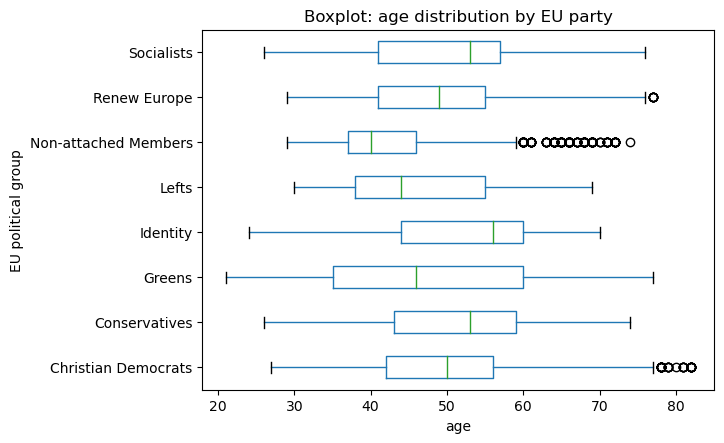

In [86]:
df_boxplot.boxplot(by='EU political group', column=['age_atDebate'], grid=False, vert=False)
plt.title('Boxplot: age distribution by EU party')
plt.suptitle('')
plt.xlabel("age")

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/boxplot_age-by-party.png', bbox_inches='tight')

In [87]:
df_debates_pairplot = df_debates_age_1.drop(df.columns[[1, 2, 4, 5, 7, 8, 9, 11, 12, 14, 18, 19, 20]], axis=1)
df_debates_pairplot = df_debates_pairplot.drop(columns=['mmYYYY'])
df_debates_pairplot

int_id             speaker speaker_id language EU political group  \
0        2-008-000          Presidente       4436       it                NaN   
2        2-010-000        Sajjad Karim      28481       en                NaN   
3        2-011-000      Ulrike Lunacek      97017       en                NaN   
4        2-013-000       Martin Schulz       1911       de                NaN   
5        2-014-000  Beatrix von Storch     124825       de                NaN   
...            ...                 ...        ...      ...                ...   
275090  3-367-0000            Vera Tax     197756       nl         Socialists   
275091  3-368-0000        Ciarán Cuffe     197654       ga             Greens   
275092  3-369-0000      Sēdes vadītājs      28615       lv      Conservatives   
275094  3-371-0000      Sēdes vadītājs      28615       lv      Conservatives   
275095  3-380-0000      Sēdes vadītājs      28615       lv      Conservatives   

            nationalty gender  birth_year  debate_year  age_atDebate  
0                Italy      M        1958         2014            56  
2       United Kingdom      M        1970         2014            44  
3              Austria      F        1957         2014            57  
4              Germany      M        1955         2014            59  
5              Germany      F        1971         2014            43  
...                ...    ...         ...          ...           ...  
275090     Netherlands      F        1972         2022            50  
275091         Ireland      M        1963         2022            59  
275092          Latvia      M        1958         2022            64  
275094          Latvia      M        1958         2022            64  
275095          Latvia      M        1958         2022            64  

[260651 rows x 10 columns]

array([[<AxesSubplot: title={'center': 'birth_year'}>,
        <AxesSubplot: title={'center': 'debate_year'}>],
       [<AxesSubplot: title={'center': 'age_atDebate'}>, <AxesSubplot: >]],
      dtype=object)

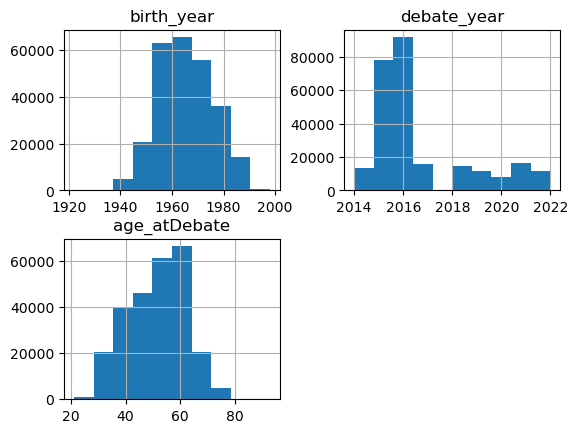

In [88]:
df_debates_pairplot.hist()

In [89]:
df_debates_pairplot

int_id             speaker speaker_id language EU political group  \
0        2-008-000          Presidente       4436       it                NaN   
2        2-010-000        Sajjad Karim      28481       en                NaN   
3        2-011-000      Ulrike Lunacek      97017       en                NaN   
4        2-013-000       Martin Schulz       1911       de                NaN   
5        2-014-000  Beatrix von Storch     124825       de                NaN   
...            ...                 ...        ...      ...                ...   
275090  3-367-0000            Vera Tax     197756       nl         Socialists   
275091  3-368-0000        Ciarán Cuffe     197654       ga             Greens   
275092  3-369-0000      Sēdes vadītājs      28615       lv      Conservatives   
275094  3-371-0000      Sēdes vadītājs      28615       lv      Conservatives   
275095  3-380-0000      Sēdes vadītājs      28615       lv      Conservatives   

            nationalty gender  birth_year  debate_year  age_atDebate  
0                Italy      M        1958         2014            56  
2       United Kingdom      M        1970         2014            44  
3              Austria      F        1957         2014            57  
4              Germany      M        1955         2014            59  
5              Germany      F        1971         2014            43  
...                ...    ...         ...          ...           ...  
275090     Netherlands      F        1972         2022            50  
275091         Ireland      M        1963         2022            59  
275092          Latvia      M        1958         2022            64  
275094          Latvia      M        1958         2022            64  
275095          Latvia      M        1958         2022            64  

[260651 rows x 10 columns]

<AxesSubplot: xlabel='count', ylabel='EU political group'>

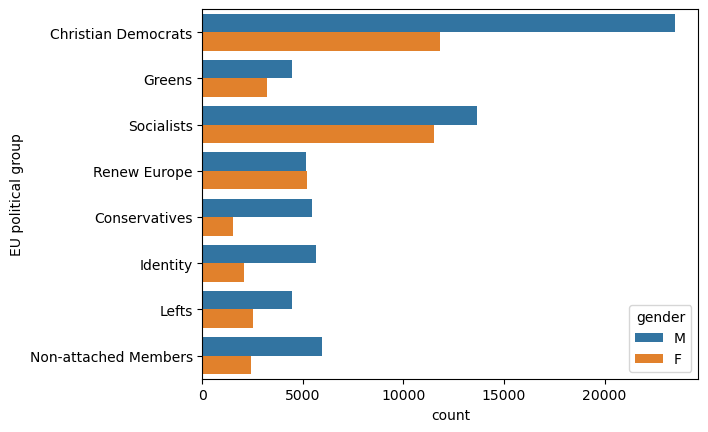

In [90]:
#same as further up
sns.countplot(y= 'EU political group', hue= 'gender', data= df_debates_pairplot)
#plt.xticks(rotation=90)

## Fisher's exact test
https://www.reneshbedre.com/blog/fisher-exact-test-python.html
751 seats in 2014 AND 2019

2014 women: 37% - 278
2014 men: 63% - 473
2019 women: 41% - 308
2019 men: 59% - 443

In [91]:
df_debates.head()

int_id    debate_id       date             speaker  is_mep  \
0  2-008-000  20140701.EN 2014-07-01          Presidente    True   
2  2-010-000  20140701.EN 2014-07-01        Sajjad Karim    True   
3  2-011-000  20140701.EN 2014-07-01      Ulrike Lunacek    True   
4  2-013-000  20140701.EN 2014-07-01       Martin Schulz    True   
5  2-014-000  20140701.EN 2014-07-01  Beatrix von Storch    True   

                                                text speaker_id role  party  \
0   Ringrazio il maestro e tutta l'orchestra. Ric...       4436  NaN    NaN   
2   Mr President, I rise to speak with a sense of...      28481  NaN    NaN   
3   Mr President, firstly let me welcome all the ...      97017  NaN    NaN   
4   Herr Präsident, meine sehr geehrten Damen und...       1911  NaN    NaN   
5   Herr Präsident! Mein Name ist Beatrix von Sto...     124825  NaN    NaN   

                                     text_translated  ...      nationalty  \
0  I thank the master and the whole orchestra.I r...  ...           Italy   
2  Mr President, I rise to speak with a sense of ...  ...  United Kingdom   
3  Mr President, firstly let me welcome all the n...  ...         Austria   
4  Mr. President, my dear ladies and gentlemen, d...  ...         Germany   
5  Mister President!My name is Beatrix von Storch...  ...         Germany   

  gender birth_year       birth_place  \
0      M       1958       Lauria (PZ)   
2      M       1970        Lancashire   
3      F       1957  Krems a.d. Donau   
4      M       1955          Hehlrath   
5      F       1971            Lübeck   

                                    political_groups  \
0  20-07-1999 / 19-07-2004 : Group of the Party o...   
2  20-07-2004 / 11-12-2007 : Group of the Allianc...   
3  14-07-2009 / 04-02-2013 : Group of the Greens/...   
4  19-07-1994 / 19-07-1999 : Group of the Party o...   
5  01-07-2014 / 07-04-2016 : European Conservativ...   

                                    national_parties  YYYY  debate_year  \
0  20-07-1999 / 19-07-2004 : Democratici di Sinis...  2014         2014   
2  20-07-2004 / 13-07-2009 : UK Independence Part...  2014         2014   
3  14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...  2014         2014   
4  19-07-1994 / 19-07-1999 : Sozialdemokratische ...  2014         2014   
5  01-07-2014 / 23-10-2017 : Alternative für Deut...  2014         2014   

  age_atDebate     mmYYYY  
0           56 2014-07-01  
2           44 2014-07-01  
3           57 2014-07-01  
4           59 2014-07-01  
5           43 2014-07-01  

[5 rows x 25 columns]

In [92]:
df_gender_2014 = df_debates[(df_debates["date"] >= '2014-07-01') &(df_debates["date"] < '2019-07-02')]
df_gender_2019 = df_debates[df_debates["date"] >= '2019-07-02']
df_gender_2019.head()

int_id    debate_id       date            speaker  is_mep  \
228213  1-005-0000  20190702.EN 2019-07-02  Provisional Chair    True   
228214  1-006-0000  20190702.EN 2019-07-02                NaN    True   
228215  1-007-0000  20190702.EN 2019-07-02                NaN    True   
228216  1-008-0000  20190702.EN 2019-07-02                NaN    True   
228217  1-012-0000  20190702.EN 2019-07-02         Presidente    True   

                                                     text speaker_id role  \
228213   Good morning everybody. Welcome to the Europe...       2187  NaN   
228214   A norma dell'Atto del 20 settembre 1976 relat...       2187  NaN   
228215   Bienvenidos todos, buen trabajo a los diputad...       2187  NaN   
228216   Ascolteremo ora l'inno europeo eseguito dal Q...       2187  NaN   
228217   Ricordo che, a norma dell'articolo 14, paragr...       2187  NaN   

        party                                    text_translated  ...  \
228213    NaN  Good morning everybody. Welcome to the Europea...  ...   
228214    NaN  In accordance with the act of 20 September 197...  ...   
228215    NaN  Welcome all, good work to new deputies and tho...  ...   
228216    NaN  We will now listen to the European anthem perf...  ...   
228217    NaN  I remember that, pursuant to article 14, parag...  ...   

       nationalty gender birth_year birth_place  \
228213      Italy      M       1953        Roma   
228214      Italy      M       1953        Roma   
228215      Italy      M       1953        Roma   
228216      Italy      M       1953        Roma   
228217      Italy      M       1953        Roma   

                                         political_groups  \
228213  19-07-1994 / 04-07-1995 : Forza Europa Group -...   
228214  19-07-1994 / 04-07-1995 : Forza Europa Group -...   
228215  19-07-1994 / 04-07-1995 : Forza Europa Group -...   
228216  19-07-1994 / 04-07-1995 : Forza Europa Group -...   
228217  19-07-1994 / 04-07-1995 : Forza Europa Group -...   

                                         national_parties  YYYY  debate_year  \
228213  19-07-1994 / 19-07-1999 : Forza Italia (Italy)...  2019         2019   
228214  19-07-1994 / 19-07-1999 : Forza Italia (Italy)...  2019         2019   
228215  19-07-1994 / 19-07-1999 : Forza Italia (Italy)...  2019         2019   
228216  19-07-1994 / 19-07-1999 : Forza Italia (Italy)...  2019         2019   
228217  19-07-1994 / 19-07-1999 : Forza Italia (Italy)...  2019         2019   

       age_atDebate     mmYYYY  
228213           66 2019-07-01  
228214           66 2019-07-01  
228215           66 2019-07-01  
228216           66 2019-07-01  
228217           66 2019-07-01  

[5 rows x 25 columns]

In [93]:
df_gender_2014_ct = df_gender_2014['gender'].value_counts()
df_gender_2014_ct
# M: 140.555~140555/219421=0,64
# F: 78.866~78866/219421=0,36

M    140555
F     78866
Name: gender, dtype: int64

In [94]:
df_gender_2019_ct = df_gender_2019['gender'].value_counts()
df_gender_2019_ct
# M: 23.551~23551/41230=0,57
# F: 17.679~17679/41230=0,43

M    23551
F    17679
Name: gender, dtype: int64

In [95]:
# MEPs
# 2014 women: 37% - 278
# 2014 men: 63% - 473
# 2019 women: 41% - 308
# 2019 men: 59% - 443

# using %
fisher_2014 = pd.DataFrame({'MEP':[37, 63], 'speakers':[36, 64]}, index=pd.Index(['women', 'men']))
fisher_2019 = pd.DataFrame({'MEP':[41, 59], 'speakers':[43, 57]}, index=pd.Index(['women', 'men']))
fisher_2019
# # using absolute numbers
# fisher_2014 = pd.DataFrame({'MEP':[278, 473], 'speakers':[78866, 140555]}, index=pd.Index(['women', 'men']))
# fisher_2019 = pd.DataFrame({'MEP':[308, 443], 'speakers':[17679, 23551]}, index=pd.Index(['women', 'men']))
# fisher_2019

MEP  speakers
women   41        43
men     59        57

In [96]:
# using %
fisher_2014_dict = {('MEP', 'women'): 37, ('MEP', 'men'): 63, ('speakers', 'women'): 36, 
           ('speakers', 'men'): 64}

# using absolute numbers
# fisher_2014_dict = {('MEP', 'women'): 278, ('MEP', 'men'): 473, ('speakers', 'women'): 78866, 
#            ('speakers', 'men'): 140555}

Text(0.5, 1.0, 'Mosaic plot for 8th EP')

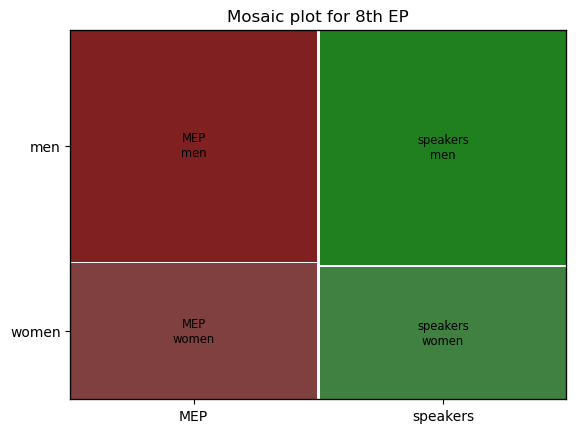

In [97]:
#pckg statsmodels
mosaic(fisher_2014_dict)
plt.title('Mosaic plot for 8th EP')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/mosaic_pct_8.png', bbox_inches='tight')

In [98]:
# using %
fisher_2019_dict = {('MEP', 'women'): 41, ('MEP', 'men'): 59, ('speakers', 'women'): 43, 
           ('speakers', 'men'): 57}

# using absolute numbers
# fisher_2019_dict = {('MEP', 'women'): 308, ('MEP', 'men'): 443, ('speakers', 'women'): 17679, 
#            ('speakers', 'men'): 23551}

Text(0.5, 1.0, 'Mosaic plot for 9th EP')

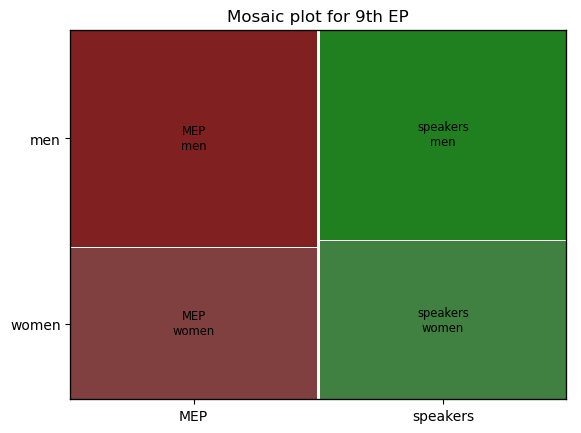

In [99]:
#pckg statsmodels
mosaic(fisher_2019_dict)
plt.title('Mosaic plot for 9th EP')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/mosaic_pct_9.png', bbox_inches='tight')

In [100]:
fisher_2014

MEP  speakers
women   37        36
men     63        64

In [101]:
oddsr, p14 = fisher_exact(table=fisher_2014.to_numpy(), alternative='two-sided')
oddsr, p14
#output (xxx, xxx) odds ratio, p-value (p value significant if <0.05, if less, no significant associatioin between variables)
# %: (1.0440917107583774, 1.0)
# absolute: (1.0474664950729444, 0.5423937340446305)

(1.0440917107583774, 1.0)

In [102]:
fisher_2019

MEP  speakers
women   41        43
men     59        57

In [103]:
oddsr, p19 = fisher_exact(table=fisher_2019.to_numpy(), alternative='two-sided')
oddsr, p19
# %: (0.9211667323610564, 0.8861322322064675)
# absolute: (0.9261869274701579, 0.31522773541017285)

(0.9211667323610564, 0.8861322322064682)